In this project, you will visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset values were collected during medical examinations.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("medical_examination.csv")

In [ ]:
df.sample(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
20454,29196,17701,1,173,99.0,140,90,1,1,0,0,1,1
62160,88761,18380,2,184,75.0,110,70,1,1,0,0,0,0
15933,22750,17598,2,169,71.0,120,80,1,1,0,0,1,0
48801,69681,20598,1,152,90.0,120,80,2,1,0,0,0,1
23051,32934,19599,1,160,68.0,100,60,1,1,0,0,0,0


Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [ ]:
df["BMI"] = df.weight / ((df.height/100)**2)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


np.where(condition, value if condition is true, value if condition is false)

In [ ]:
df["overweight"] = np.where(df.BMI > 25, 1, 0)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0


Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

In [ ]:
df.cholesterol = np.where(df.cholesterol > 1, 1, 0)
df.gluc = np.where(df.gluc > 1, 1, 0)

In [ ]:
df.sample(7)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
27648,39532,21982,2,180,89.0,120,80,0,0,1,0,1,0,27.469136,1
27433,39228,21679,1,168,73.0,140,100,0,0,0,0,1,0,25.864512,1
40594,58006,19463,1,159,62.0,140,80,0,0,0,0,1,0,24.524346,0
47791,68243,21089,2,165,123.0,140,80,0,1,0,1,1,0,45.179063,1
47267,67519,22556,1,159,68.0,140,80,1,0,1,0,0,1,26.897670,1
44758,63917,14359,2,165,65.0,120,80,0,0,0,0,1,0,23.875115,0
13008,18551,21330,2,169,66.0,120,80,0,0,0,0,1,0,23.108435,0


Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.

In [ ]:
df_plot = pd.melt(df, id_vars='cardio', value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
df_plot.head()

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0


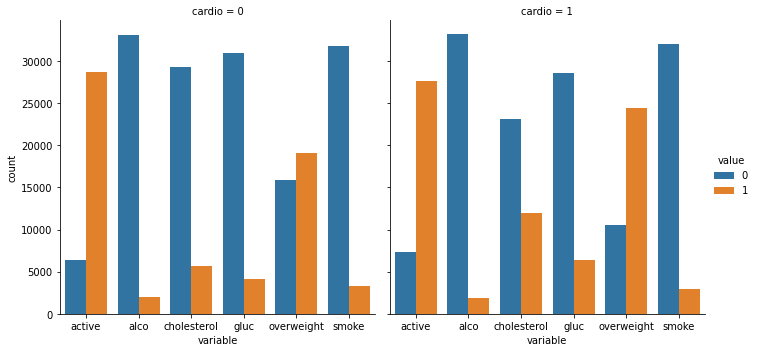

In [ ]:
cardio_plot = sns.catplot(data=df_plot, x='variable', hue='value', col="cardio", kind="count", ci="None")
plt.show()

Clean the data. Filter out the following patient segments that represent incorrect data:
* diastolic pressure is higher than systolic (Keep the correct data with (df
['ap_lo'] <= df['ap_hi']))
* height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
* height is more than the 97.5th percentile
* weight is less than the 2.5th percentile
* weight is more than the 97.5th percentile

In [ ]:
df = df.drop(df[df.ap_lo > df.ap_hi].index)
df = df.drop(df[df.height < df.height.quantile(0.025)].index)
df = df.drop(df[df.height > df.height.quantile(0.975)].index)
df = df.drop(df[df.weight < df.weight.quantile(0.025)].index)
df = df.drop(df[df.weight > df.weight.quantile(0.975)].index)

In [ ]:
df.head(8)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0
5,8,21914,1,151,67.0,120,80,1,1,0,0,0,0,29.384676,1
6,9,22113,1,157,93.0,130,80,1,0,0,0,1,0,37.729725,1
7,12,22584,2,178,95.0,130,90,1,1,0,0,1,1,29.983588,1


Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.

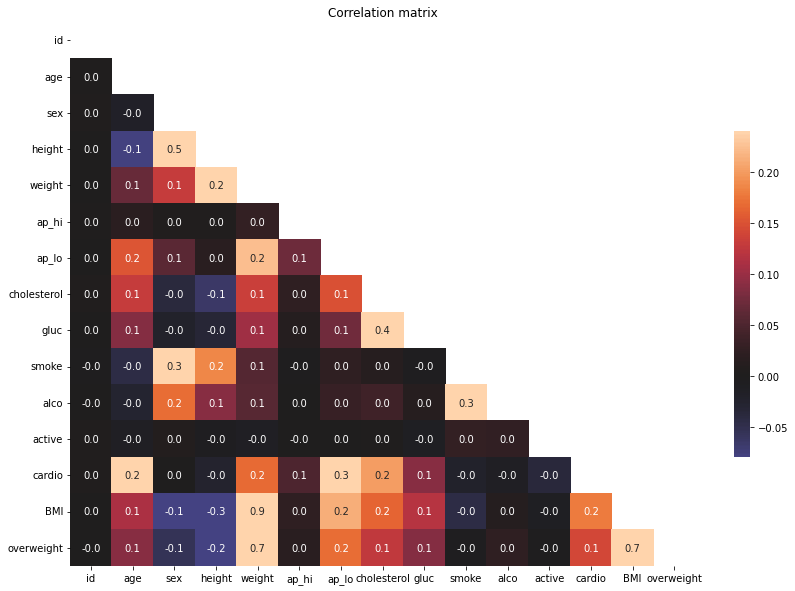

In [ ]:
plt.figure(figsize=(14, 10))
corr=df.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask
heat_map = sns.heatmap(corr, annot=True, center=0, mask=matrix, fmt='.1f', cbar_kws={"shrink": 0.6}, vmax=0.24, vmin=-0.08) #cmap="viridis"
plt.title("Correlation matrix")
plt.show()